## Model Training on Historical Data

In [8]:
import pandas as pd
df= pd.read_csv("C:/Users/user/Desktop/p/karachi_aqi_features.csv")

In [183]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
df['aqi_next_hour'] = df['aqi'].shift(-1)
X = df.drop(columns=['timestamp', 'aqi', 'aqi_next_hour'])
y = df['aqi_next_hour']

X = X.iloc[:-1]
y = y.iloc[:-1]


train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,       
        max_depth=8,            
        min_samples_leaf=10,    
        max_features='sqrt',    
        random_state=42
    ),
    "XGBoost": XGBRegressor(
         n_estimators=500,
         max_depth=6,
         learning_rate=0.05,
         subsample=0.8,
         colsample_bytree=0.8,
         random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
   
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = {"MAE": mae,"R2": r2, "CV_R2": cv_scores}
    print(f"{name} MAE: {mae:.2f}, R²: {r2:.2f}, CV_R2: {np.mean(cv_scores):.2f}")

print("\nSummary:")
print(results)


Linear Regression MAE: 7.90, R²: 0.55, CV_R2: 0.47
Ridge MAE: 7.79, R²: 0.57, CV_R2: 0.47
Random Forest MAE: 3.31, R²: 0.91, CV_R2: 0.79
XGBoost MAE: 2.08, R²: 0.95, CV_R2: 0.85

Summary:
{'Linear Regression': {'MAE': 7.899771749641404, 'R2': 0.5547705954712615, 'CV_R2': array([-0.13128785,  0.40348382,  0.82733419,  0.69213186,  0.5547706 ])}, 'Ridge': {'MAE': 7.790267346001537, 'R2': 0.5663955923211887, 'CV_R2': array([-0.13207119,  0.4023108 ,  0.82902639,  0.69327962,  0.56639559])}, 'Random Forest': {'MAE': 3.314907890047689, 'R2': 0.911463309903697, 'CV_R2': array([0.44839128, 0.73121003, 0.90568484, 0.93545249, 0.91146331])}, 'XGBoost': {'MAE': 2.0793267409739222, 'R2': 0.9512392879690716, 'CV_R2': array([0.5746026 , 0.80940635, 0.92860543, 0.96962674, 0.95123929])}}


In [184]:
import joblib
import numpy as np
from xgboost import XGBRegressor

best_model_name = "XGBoost"
best_model = models[best_model_name]

best_model.fit(X, y)

joblib.dump(best_model, "best_aqi_model.pkl")
print("Best model retrained on full data and saved as 'best_aqi_model.pkl'")


Best model retrained on full data and saved as 'best_aqi_model.pkl'


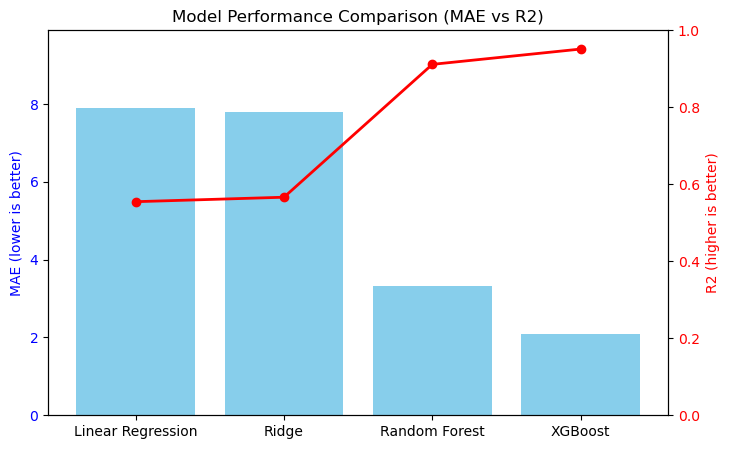

In [185]:
import matplotlib.pyplot as plt

models = list(results.keys())
mae = [results[m]["MAE"] for m in models]
r2 = [results[m]["R2"] for m in models]

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(models, mae, color='skyblue', label='MAE')
ax1.set_ylabel("MAE (lower is better)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max(mae) + 2)


ax2 = ax1.twinx()
ax2.plot(models, r2, color='red', marker='o', linewidth=2, label='R²')
ax2.set_ylabel("R2 (higher is better)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1)

plt.title("Model Performance Comparison (MAE vs R2)")
plt.show()


In [188]:
import joblib
import pandas as pd


model = joblib.load("best_aqi_model.pkl")
print("Model loaded successfully!")


data = pd.read_csv("prev_features.csv")

feature_columns = ['pm25', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 
                   'wind_speed', 'hour', 'day', 'month', 'weekday', 'is_weekend', 
                   'aqi_change_rate', 'pm25_to_pm10_ratio', 'temp_change', 
                   'humidity_change', 'weather_code']

X_new = data[feature_columns]

predictions = model.predict(X_new)
data['predicted_aqi_next_hour'] = predictions

print(data[['predicted_aqi_next_hour']])


Model loaded successfully!
   predicted_aqi_next_hour
0               153.329315


In [3]:
!python --version
!pip show joblib scikit-learn numpy

Python 3.11.7
Name: joblib
Version: 1.2.0
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: Gael Varoquaux
Author-email: gael.varoquaux@normalesup.org
License: BSD
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: 
Required-by: imbalanced-learn, nltk, scikit-learn
---
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, shap
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that 

In [4]:
!pip show xgboost

Name: xgboost
Version: 3.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [5]:
!pip show pandas

Name: pandas
Version: 2.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [7]:
import sys, pandas, numpy, xgboost, joblib
print(sys.version)
print(pandas.__version__," ", numpy.__version__," ", xgboost.__version__," ", joblib.__version__)


3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
2.1.4   1.26.4   3.1.1   1.2.0


In [8]:
import xgboost, joblib
print(xgboost.__version__, joblib.__version__)


3.1.1 1.2.0


In [10]:
import joblib, sklearn
print("scikit-learn", sklearn.__version__)

scikit-learn 1.2.2


               Feature  Importance
10         temp_change   10.312963
1                 pm10    9.624840
8      aqi_change_rate    9.577908
4          temperature    5.770708
0                 pm25    3.430950
3                   o3    2.842480
6           wind_speed    1.602450
9   pm25_to_pm10_ratio    1.250078
11     humidity_change    1.137094
5             humidity    1.029706
7                 hour    1.008096
2                  no2    0.551808
12        weather_code    0.134981


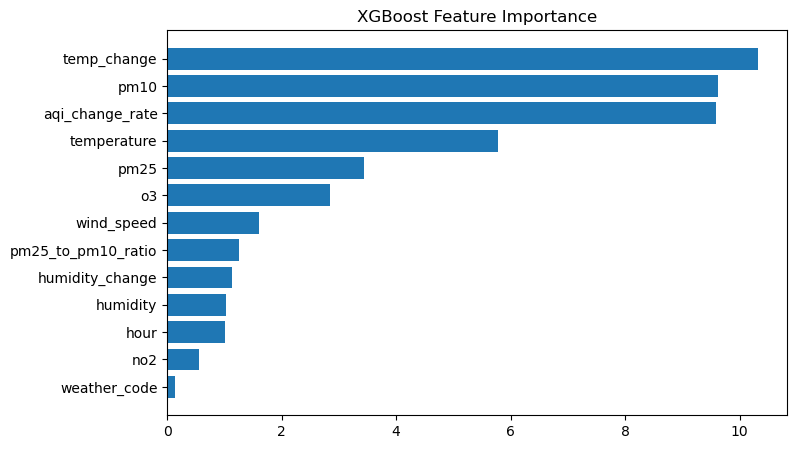

In [14]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import joblib
model=joblib.load("C:/Users/user/Desktop/p/Project/best_aqi_model.pkl")
feature_names = [
    "pm25","pm10","no2","o3","temperature","humidity","wind_speed",
    "hour","day","month","weekday","is_weekend",
    "aqi_change_rate","pm25_to_pm10_ratio","temp_change","humidity_change","weather_code"
]

importance = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('XGBoost Feature Importance')
plt.show()
